# CLASSIFICATION WITH BIDIRECTIONAL LONG SHORT-TERM MEMORY (LSTM) NETWORKS 

by ChunkDevs (Group 1)

<div style="font-size: 16px">
    
Long Short-Term Memory (LSTM) networks are one of the most commonly used extensions to recurrent neural networks (RNNs), thanks to their ability of removing information no longer needed from the context and adding information likely to be needed by the use of gates to control the flow of information into and out of the units that
comprise the network layers.  

In this notebook we will implement a Bi-directional LSTM as a classification model for our binary and multiclass cyberbullying detection tasks, using the `tensorflow.keras` library. 

</div>

In [1]:
import sys
import os

directory = os.getcwd().split(os.path.sep)
root_index = directory.index("V_HLT")
root_path = os.path.sep.join(directory[:root_index+1])

sys.path.append(root_path)

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from _chunkdevs.models import  ChunkDevs_LSTM
from _chunkdevs.data_functions import *

c:\Users\ASUS\anaconda3\envs\HLT\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA LOADING

In [3]:
dev_path = os.path.join(root_path, "data", "processed", "english_tweets_dev_set.csv")
dev = pd.read_csv(dev_path, encoding="utf-8", skipinitialspace=True)

test_path = os.path.join(root_path, "data", "processed", "english_tweets_test_set.csv")
test = pd.read_csv(test_path, encoding="utf-8", skipinitialspace=True)

<div style="font-size: 16px">
<br>

We set two parameters for `TextVectorization`, the pipeline of TensorFlow to preprocess textual data into a format suitable for training deep learning models:


*   `VOCAB_SIZE`: specifies the maximum size of the vocabulary to be used in tokenizing text data;
*   `MAX_LEN`: defines a fixed-size inputs for sequences after tokenization.

We also keep the same values of `RANDOM STATE` and `VAL_SIZE` for guaranteed the reproducibility of the procedures and results and 5 `PLOT_EPOCHS` for representing the models learning curves.


</div>

In [4]:
VOCAB_SIZE = 50000
MAX_LEN = 100
RANDOM_STATE = 42 
VAL_SIZE = .2
BATCH_SIZE = 32
PLOT_EPOCHS = 5

In [5]:
X_dev = dev["tweet_text_cleaned"]
X_test = test["tweet_text"]

# BINARY CLASSIFICATION TASK

<div style="font-size: 16px">

We define the architecture of a bidirectional LSTM, which extend the capabilities of traditional LSTMs by processing sequences in both forward and backward directions, thereby enhancing the model's ability to learn complex sequential patterns and contexts. For the initialization of the model, we decided to create our class `ChunkDevs_LSTM`, which allows us to build the model, prepare the input data, train, evaluate, predict and show the results and classification reports using the appropriate methods. After the experiments, we will save the final models and the scores. 

In addition to the two parameters already defined above (`VOCAB_SIZE` and `MAX_LEN`), there are also:

*   `embedding_dim`: determines the dimensionality of the word embeddings, which transform words into dense vectors before feeding them into the neural network;
*   `lstm_units`: defines the number of units in the LSTM layer, which processes sequential data and maintains long-term dependencies;
*   `dropout_rate`: specifies the dropout rate, a regularization technique that randomly drops a fraction of connections between neurons during training to prevent overfitting;
*   `val_size`: represents the proportion of data to be used as validation data during training, typically used for evaluating model performance and tuning hyperparameters (not in this case, because we didn't do any grid search for the network);
*   `random_state`: sets the seed which ensures reproducibility of the results;
*   `metrics`: specifies the evaluation metrics to monitor during training and evaluation (**F1-Score for binary**, whereas we use **accuracy for multiclass** classification task).

</div>

In [6]:
model_bin = ChunkDevs_LSTM(
    vocab_size=VOCAB_SIZE,
    sequence_length=MAX_LEN,
    embedding_dim=128,
    lstm_units=16,
    dropout_rate=.3,
    val_size=VAL_SIZE,
    random_state=RANDOM_STATE,
    metrics="binary"
)

## MODEL SELECTION

<div style="font-size: 16px">
    
We used the method `prepare_data` to vectorize the dev-set with the `TextVectorization` of `tensorflow.keras.layers` library, and to the respective variables the train, val and test set, all in one instruction 
</div>

In [7]:
X_dev, y_dev, X_train, y_train_bin, X_val, y_val_bin, X_test, y_test_bin = model_bin.prepare_data(X_dev= X_dev, X_test= X_test, y_dev= dev["cyberbullying_type_bin"], y_test= test["cyberbullying_type_bin"])

<div style="font-size: 16px">
    
With the method `train` of our class, we start the learning process of the LSTM model.

The first step is to represent the learning and accuracy curves, in order to choose the right number of epochs for our model and to avoid an overfitting situation. Giving an anticipation, the number of epoch that is resulted as the best is 2.
</div>

In [8]:
model_bin.train(X_train, y_train_bin, X_val, y_val_bin, batch_size=BATCH_SIZE, epochs=PLOT_EPOCHS)

Epoch 1/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 49s 70ms/step - F1Score: 0.5095 - loss: 0.3656 - val_F1Score: 0.7016 - val_loss: 0.2807
Epoch 2/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - F1Score: 0.7563 - loss: 0.2459 - val_F1Score: 0.7378 - val_loss: 0.2826
Epoch 3/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 48s 73ms/step - F1Score: 0.8274 - loss: 0.2016 - val_F1Score: 0.7497 - val_loss: 0.3176
Epoch 4/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - F1Score: 0.8617 - loss: 0.1643 - val_F1Score: 0.7306 - val_loss: 0.3435
Epoch 5/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 47s 72ms/step - F1Score: 0.8989 - loss: 0.1284 - val_F1Score: 0.7099 - val_loss: 0.4093
Training completed.


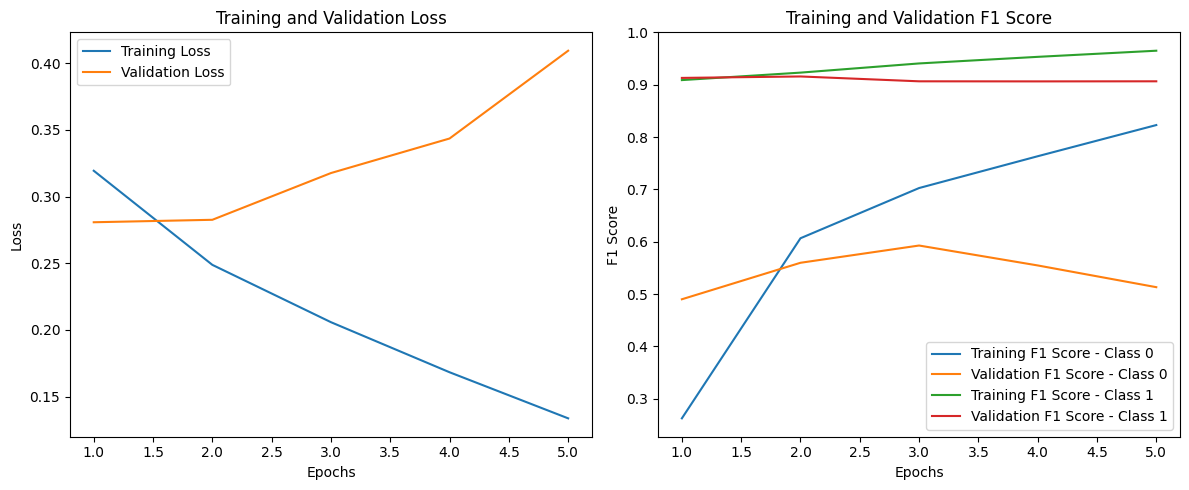

In [9]:
df_history = pd.DataFrame(model_bin.history.history)

df_history["f1_score_class_0"] = df_history["F1Score"].apply(lambda x: x[0])
df_history["f1_score_class_1"] = df_history["F1Score"].apply(lambda x: x[1])
df_history["val_f1_score_class_0"] = df_history["val_F1Score"].apply(lambda x: x[0])
df_history["val_f1_score_class_1"] = df_history["val_F1Score"].apply(lambda x: x[1])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_history.index + 1, df_history["loss"], label="Training Loss")
plt.plot(df_history.index + 1, df_history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_history.index + 1, df_history["f1_score_class_0"], label="Training F1 Score - Class 0")
plt.plot(df_history.index + 1, df_history["val_f1_score_class_0"], label="Validation F1 Score - Class 0")
plt.plot(df_history.index + 1, df_history["f1_score_class_1"], label="Training F1 Score - Class 1")
plt.plot(df_history.index + 1, df_history["val_f1_score_class_1"], label="Validation F1 Score - Class 1")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score")
plt.legend()

plt.tight_layout()
plt.show()

<div style="font-size: 18px;">    

Looking at the curves, we see that at the second epoch the **model slightly overfits**. This might be due to the complexity of the model or the small size of the dataset. However the definitve value of epoch that has been chosen is 2.

<br></div>

## MODEL ASSESSMENT

<div style="font-size: 16px;">

Representation of the performances of the model trainted on the train set and tested on the validation set

</div>

In [10]:
model_bin = ChunkDevs_LSTM(
    vocab_size=VOCAB_SIZE,
    sequence_length=MAX_LEN,
    embedding_dim=128,
    lstm_units=16,
    dropout_rate=.3,
    val_size=VAL_SIZE,
    random_state=RANDOM_STATE,
    metrics="binary"
)

In [11]:
model_bin.train(X_train, y_train_bin, X_val, y_val_bin, batch_size=BATCH_SIZE, epochs=2)

Epoch 1/2
656/656 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - F1Score: 0.5259 - loss: 0.3984 - val_F1Score: 0.7417 - val_loss: 0.2931
Epoch 2/2
656/656 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - F1Score: 0.7646 - loss: 0.2490 - val_F1Score: 0.7299 - val_loss: 0.2783
Training completed.


In [12]:
report = model_bin.get_classification_report(X_val, y_val_bin)
print(report)

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.57      0.53      0.55       859
           1       0.91      0.92      0.91      4389

    accuracy                           0.86      5248
   macro avg       0.74      0.72      0.73      5248
weighted avg       0.85      0.86      0.85      5248



164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


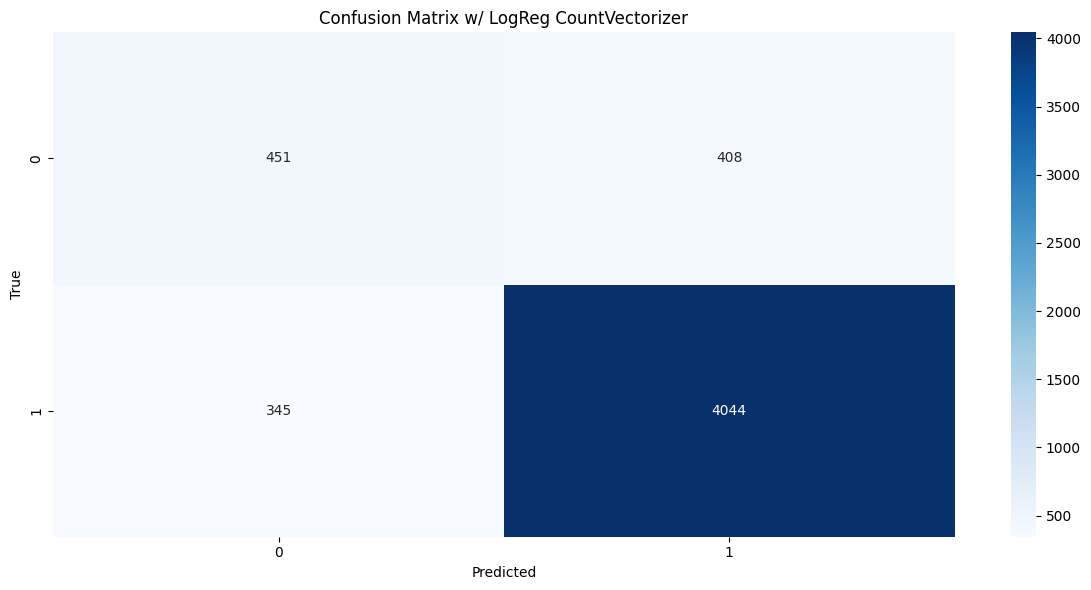

In [13]:
matrix = model_bin.get_confusion_matrix(X_val, y_val_bin)


plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix LSTM binary classification task')
plt.tight_layout()
plt.savefig(os.path.join(root_path, 'outputs', 'img', '2_advanced_models', '2_cm_lstm_assessment_bin.png'))
plt.show()

## FINAL RETRAIN AND TESTING PHASE

<div style="font-size: 16px">
    
Final training using all the dev-set in order to train our model using as much data as possible, testing on the test set. 

</div>

In [14]:
model_bin_final = ChunkDevs_LSTM(
    vocab_size=VOCAB_SIZE,
    sequence_length=MAX_LEN,
    embedding_dim=128,
    lstm_units=16,
    dropout_rate=.3,
    val_size=VAL_SIZE,
    random_state=RANDOM_STATE,
    metrics="binary"
)

<div style="font-size: 16px">
<br>
    
In order to distinguish the train-val training from the final retrain, that use all the dev-set without validation data, we use the parameter `final_retrain` method to indicate to the model to  do not use validation data during the fit. 

</div>

In [15]:
model_bin_final.final_retrain(X_dev, y_dev, batch_size=BATCH_SIZE, epochs=2)

Epoch 1/2
820/820 ━━━━━━━━━━━━━━━━━━━━ 61s 72ms/step - F1Score: 0.5138 - loss: 0.3891
Epoch 2/2
820/820 ━━━━━━━━━━━━━━━━━━━━ 59s 72ms/step - F1Score: 0.7611 - loss: 0.2464


In [16]:
report = model_bin_final.get_classification_report(X_test, y_test_bin)
print(report)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.57      0.44      0.50       487
           1       0.89      0.93      0.91      2435

    accuracy                           0.85      2922
   macro avg       0.73      0.69      0.71      2922
weighted avg       0.84      0.85      0.84      2922



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


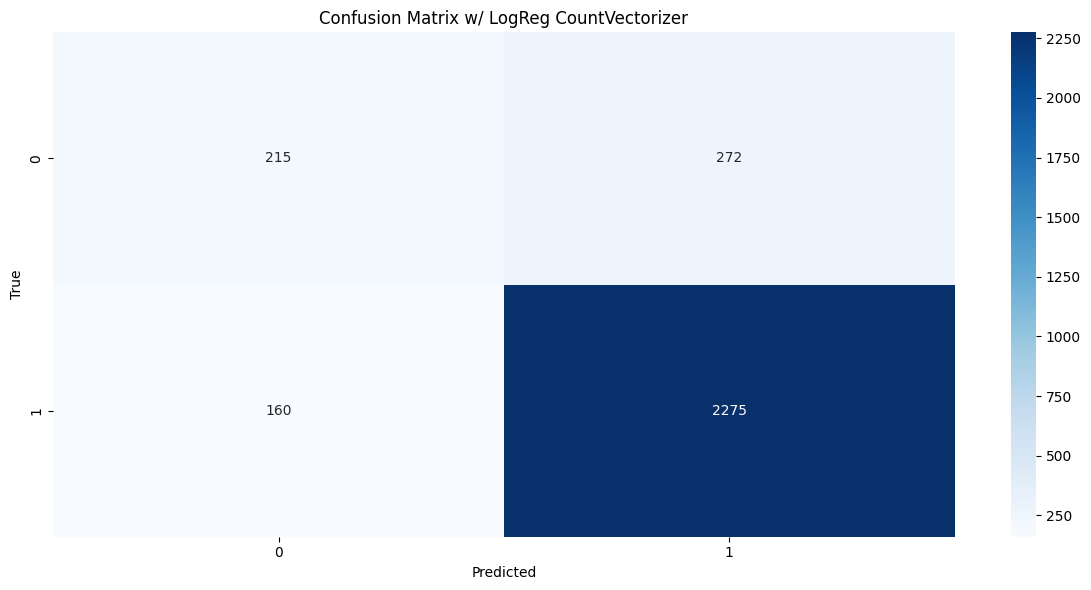

In [17]:
matrix = model_bin_final.get_confusion_matrix(X_test, y_test_bin)


plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix LSTM binary classification task')
plt.tight_layout()
plt.savefig(os.path.join(root_path, 'outputs', 'img', '2_advanced_models', '3_cm_lstm_final_bin.png'))
plt.show()

In [18]:
save_path = os.path.join(root_path, 'outputs', 'reports', 'LSTM_binary.txt')
model_bin.save_results(X_test, y_test_bin, save_path)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
---------------------------------------------------------------------------------------------------------------------------------
| Report saved to c:\Users\ASUS\OneDrive - University of Pisa\Human language technologies\V_HLT\outputs\reports\LSTM_binary.txt |
---------------------------------------------------------------------------------------------------------------------------------


# MULTICLASS CLASSIFICATION TASK

<div style="font-size: 16px;">
    
For the multiclass task we repeat the same selection-assessment-training procedure as before, but this time we have a situation of balanced learning, when we look for the model with the best accuracy.

</div>

In [36]:
# architecture for multiclass task
model_multi = ChunkDevs_LSTM(
    vocab_size=VOCAB_SIZE,
    sequence_length=MAX_LEN,
    embedding_dim=128,
    lstm_units=None,
    dropout_rate=.3,
    val_size=.2,
    random_state=42,
    metrics="multiclass"
)

X_dev = dev["tweet_text_cleaned"]
X_test = test["tweet_text"]

## MODEL SELECTION

In [37]:
X_dev, y_dev, X_train, y_train_multi, X_val, y_val_multi, X_test, y_test_multi = model_multi.prepare_data(X_dev, X_test, dev["cyberbullying_type_multi"], test["cyberbullying_type_multi"])

In [38]:
model_multi.train(X_train, y_train_multi, X_val, y_val_multi, batch_size=BATCH_SIZE, epochs=PLOT_EPOCHS)

Epoch 1/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 52s 75ms/step - accuracy: 0.4927 - loss: 1.1718 - val_accuracy: 0.7612 - val_loss: 0.5436
Epoch 2/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.7799 - loss: 0.4775 - val_accuracy: 0.7818 - val_loss: 0.5064
Epoch 3/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.8267 - loss: 0.4001 - val_accuracy: 0.7944 - val_loss: 0.5186
Epoch 4/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.8648 - loss: 0.3339 - val_accuracy: 0.7891 - val_loss: 0.5613
Epoch 5/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.8970 - loss: 0.2726 - val_accuracy: 0.7919 - val_loss: 0.5837
Training completed.


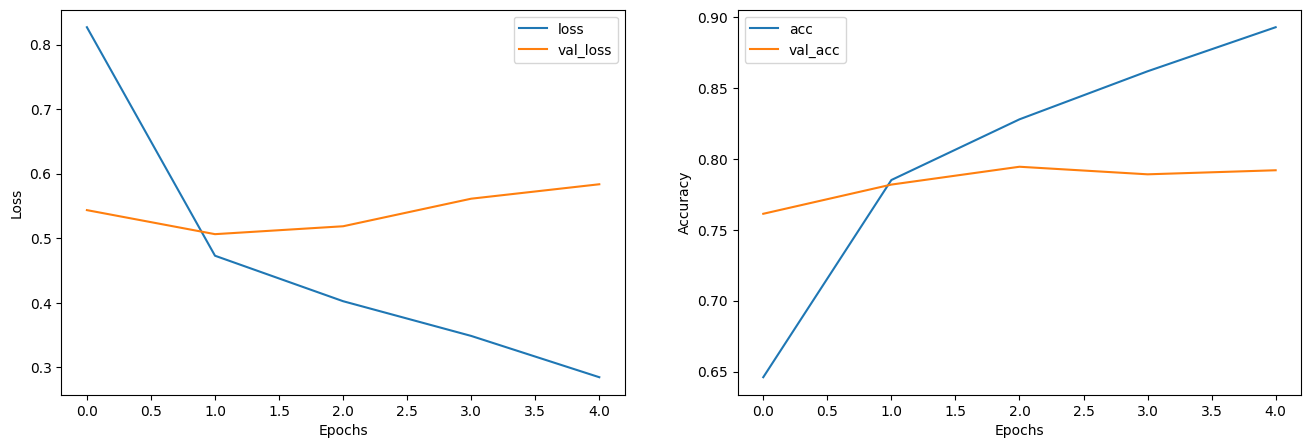

In [39]:
df_history = pd.DataFrame(model_multi.history.history)

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.plot(df_history["loss"], label="loss")
plt.plot(df_history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_history["accuracy"], label="acc")
plt.plot(df_history["val_accuracy"], label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## MODEL ASSESSMENT

Representation of the performances of the model trainted on the train set and tested on the validation set

In [40]:
# architecture for multiclass task
model_multi_assess = ChunkDevs_LSTM(
    vocab_size=VOCAB_SIZE,
    sequence_length=MAX_LEN,
    embedding_dim=128,
    lstm_units=None,
    dropout_rate=.3,
    val_size=.2,
    random_state=42,
    metrics="multiclass"
)

In [41]:
model_multi_assess.train(X_train, y_train_multi, X_val, y_val_multi, batch_size=BATCH_SIZE, epochs=2)

Epoch 1/2
656/656 ━━━━━━━━━━━━━━━━━━━━ 47s 69ms/step - accuracy: 0.5226 - loss: 1.1150 - val_accuracy: 0.7445 - val_loss: 0.5711
Epoch 2/2
656/656 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.7684 - loss: 0.5082 - val_accuracy: 0.7790 - val_loss: 0.5101
Training completed.


In [44]:
report = model_multi_assess.get_classification_report(feature_data= X_val, target_data=y_val_multi)
print(report)

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


'              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95       892\n           1       0.97      0.95      0.96       861\n           2       0.88      0.78      0.82       894\n           3       0.47      0.35      0.40       859\n           4       0.49      0.70      0.58       839\n           5       0.95      0.92      0.93       903\n\n    accuracy                           0.78      5248\n   macro avg       0.79      0.78      0.78      5248\nweighted avg       0.79      0.78      0.78      5248\n'

## FINAL RETRAIN AND TESTING PHASE

In [45]:
# architecture for multiclass task
model_multi_final = ChunkDevs_LSTM(
    vocab_size=VOCAB_SIZE,
    sequence_length=MAX_LEN,
    embedding_dim=128,
    lstm_units=None,
    dropout_rate=.3,
    val_size=.2,
    random_state=42,
    metrics="multiclass"
)

In [46]:
model_multi_final.final_retrain(X_dev, y_dev, batch_size=BATCH_SIZE, epochs=2)

Epoch 1/2
820/820 ━━━━━━━━━━━━━━━━━━━━ 58s 68ms/step - accuracy: 0.5201 - loss: 1.1078
Epoch 2/2
820/820 ━━━━━━━━━━━━━━━━━━━━ 54s 66ms/step - accuracy: 0.7796 - loss: 0.4834


In [47]:
report = model_multi_final.get_classification_report(X_test, y_test_multi)
print(report)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       487
           1       0.95      0.96      0.96       487
           2       0.90      0.80      0.84       487
           3       0.41      0.29      0.34       487
           4       0.48      0.66      0.56       487
           5       0.92      0.93      0.92       487

    accuracy                           0.76      2922
   macro avg       0.77      0.76      0.76      2922
weighted avg       0.77      0.76      0.76      2922



92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


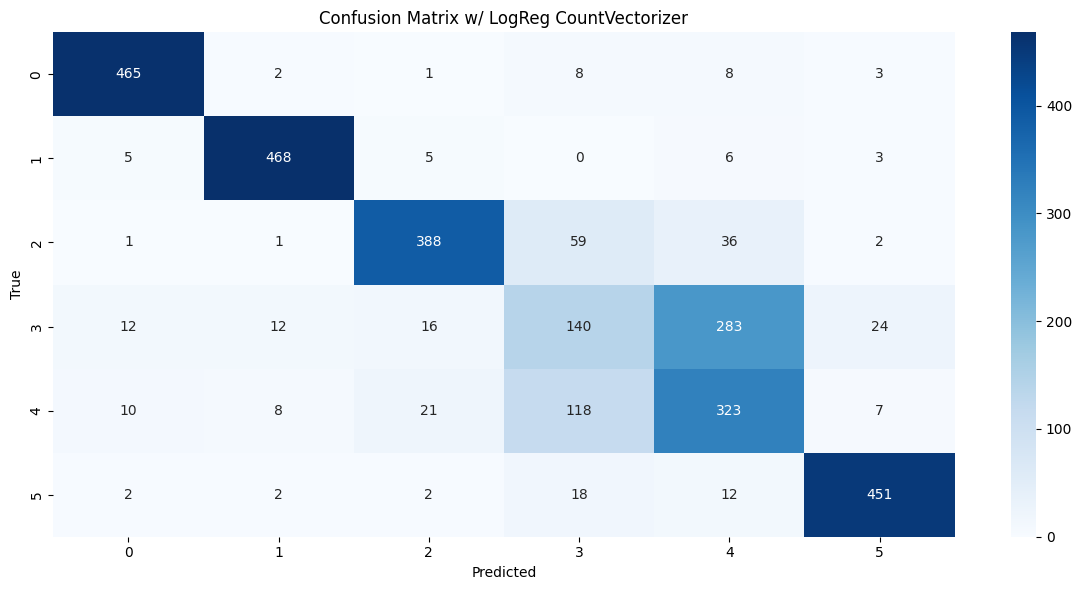

In [48]:
matrix = model_multi_final.get_confusion_matrix(X_test, y_test_multi)


plt.figure(figsize=(12, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix LSTM multiclass classification')
plt.tight_layout()
plt.savefig(os.path.join(root_path, 'outputs', 'img', '2_advanced_models', '4_cm_lstm_final_multi.png'))
plt.show()

<div style="font-size: 22px;">    

Giving the conclusions, the Bidirectional LSTM model, while slightly lower, still performs well with precision at 60% for non-cyberbullying and 89% for cyberbullying, recall at 42% and 94%, and F1-scores at 49% and 92%. These results highlight the advanced model ability to effectively identify cyberbullying tweets, particularly in maintaining high precision and recall for the positive classes, but still suffering from the **false flagging** for the not cyberbullying tweets. 

In the multiclass task, the advanced model also exhibits strong performance. The Bidirectional LSTM models both follow closely with accuracies of 83%, showcasing their robustness and consistency in performance, however, it necessary to consider that the model is in **overfitting** situation, therefore it might be necessary to review the architecture of the model in order to achieve better performances. 

<br></div>